# What is the most optimal skill to learn for Data Analysts?

### Methodology

1. Group skills to determine median salary and likelihood of being in posting
2. Visualize median salary vs percent skill demand
3. (Optional) Determine if certain technologies are more prevalent

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from datetime import datetime, date
from datasets import load_dataset

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_US = df[(df['job_title_short'] == "Data Analyst") & (df['job_country'] == "United States")].copy()

df_DA_US = df_DA_US.dropna(subset= ["salary_year_avg"])

df_DA_US_exploded = df_DA_US.explode("job_skills")

df_DA_US_exploded[["job_skills", "salary_year_avg"]].head()

,job_skills,salary_year_avg
109,python,89000.0
109,r,89000.0
109,alteryx,89000.0
109,tableau,89000.0
180,excel,90250.0


In [3]:
df_DA_skills = df_DA_US_exploded.groupby("job_skills")['salary_year_avg'].agg(["count", "median"]).sort_values("count", ascending= False)

df_DA_skills = df_DA_skills.rename(columns= {"count": "skill_count", "median": "median_salary"})

df_DA_skills

,skill_count,median_salary
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
theano,1,100000.0
typescript,1,65000.0
vmware,1,147500.0


In [4]:
DA_job_count = len(df_DA_US)

df_DA_skills["skill_percent"] = df_DA_skills["skill_count"]/ DA_job_count * 100

skill_limit = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills["skill_percent"] > skill_limit]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


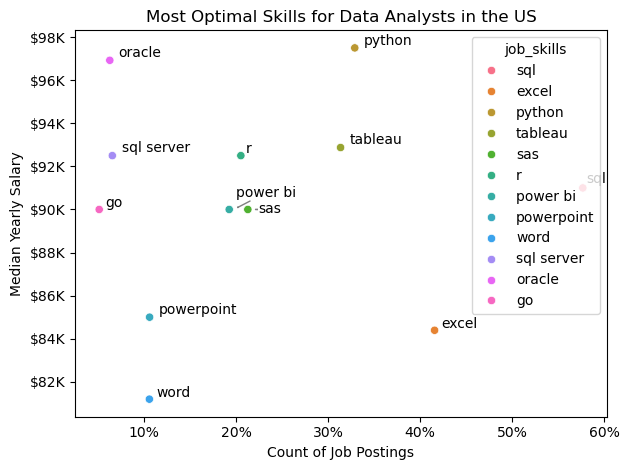

In [5]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

sns.scatterplot(data= df_DA_skills_high_demand, x= "skill_percent", y= "median_salary", hue= "job_skills")

texts = []
for idx, val in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[idx]+.5, df_DA_skills_high_demand['median_salary'].iloc[idx], val))

adjust_text(texts, arrowprops= dict(arrowstyle = "->", color= "gray"))
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals= 0))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))

plt.xlabel("Count of Job Postings")
plt.ylabel("Median Yearly Salary")
plt.title("Most Optimal Skills for Data Analysts in the US")

plt.tight_layout()
plt.show()


In [7]:
df_technology = df["job_type_skills"].copy()

# Remove NaN rows
df_technology = df_technology.dropna()

#remove duplicate rows
df_technology = df_technology.drop_duplicates()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row) # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value # if key already exists in technology_dict, add value to existing keys
        else:
            technology_dict[key] = value # if key does not exist in technology_dict, add key and value


# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['esquisse',
  'datarobot',
  'cognos',
  'spreadsheet',
  'alteryx',
  'excel',
  'ms access',
  'powerbi',
  'powerpoint',
  'splunk',
  'microstrategy',
  'word',
  'visio',
  'qlik',
  'spss',
  'power bi',
  'msaccess',
  'ssis',
  'sheets',
  'sap',
  'sharepoint',
  'looker',
  'outlook',
  'ssrs',
  'dax',
  'sas',
  'nuix',
  'tableau'],
 'programming': ['c#',
  'scala',
  'kotlin',
  'sass',
  'swift',
  'fortran',
  'visual basic',
  'javascript',
  'clojure',
  'no-sql',
  'groovy',
  'typescript',
  'objective-c',
  'ruby',
  'pascal',
  'css',
  'bash',
  'golang',
  'php',
  'vba',
  'html',
  'powershell',
  'crystal',
  'matlab',
  'julia',
  'dart',
  'ocaml',
  'shell',
  'rust',
  'mongodb',
  'vb.net',
  'assembly',
  'f#',
  'visualbasic',
  'python',
  'apl',
  'c',
  't-sql',
  'c++',
  'elixir',
  'solidity',
  'erlang',
  'haskell',
  'nosql',
  'delphi',
  'sas',
  'go',
  'mongo',
  'perl',
  'r',
  'sql',
  'java',
  'cobol',
  'lua',
  'l

In [ ]:
df_technology = pd.DataFrame(technology_dict.items(), columns= ["technology", "skills"])

df_technology = df_technology.explode("skills")

df_technology

,technology,skills
0,analyst_tools,esquisse
0,analyst_tools,datarobot
0,analyst_tools,cognos
0,analyst_tools,spreadsheet
0,analyst_tools,alteryx
...,...,...
9,sync,ringcentral
9,sync,zoom
9,sync,slack
9,sync,webex


In [28]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on= "job_skills", right_on= "skills", how= "left")

df_plot

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


4 [0.65883517 0.27389678]
5 [ 0.29329545 -0.04988533]


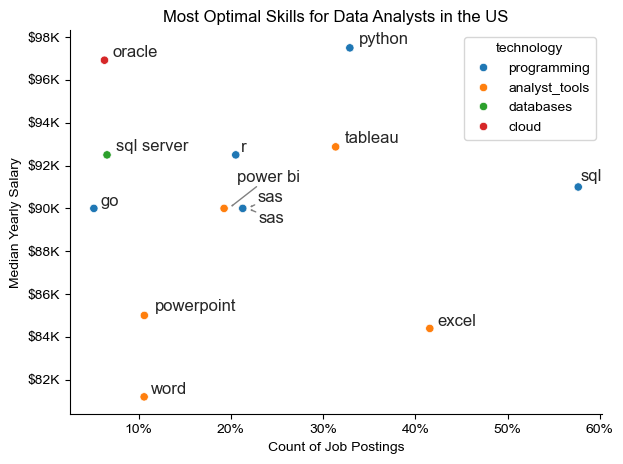

In [55]:
sns.scatterplot(data= df_plot, x= 'skill_percent', y= 'median_salary', hue= 'technology')
sns.despine()
sns.set_theme(style= "ticks")

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals= 0))

texts= []
for idx, skill in enumerate(df_plot["skills"]):
    texts.append(plt.text(df_plot["skill_percent"].iloc[idx]+.5, df_plot["median_salary"].iloc[idx], skill))

adjust_text(texts, arrowprops = dict(arrowstyle= '->', color = "grey"))

plt.xlabel("Count of Job Postings")
plt.ylabel("Median Yearly Salary")
plt.title("Most Optimal Skills for Data Analysts in the US")

plt.tight_layout()
plt.show()